In [1]:
set.seed(42)

In [2]:
install.packages("ggplot2")
library(ggplot2)
install.packages("ellipse")
library(ellipse)
install.packages("patchwork")
library(patchwork)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [74]:
children_data <- read.table("WeightLength.txt", header=TRUE)

In [75]:
means <- colMeans(children_data)
means

Weight     Length 
3233.54511   49.23764

In [76]:
covariance <- cov(children_data)
covariance

,Weight,Length
Weight,220276.6577,915.295511
Length,915.2955,4.443303


In [77]:
cor(children_data)

,Weight,Length
Weight,1.0000000,0.9251755
Length,0.9251755,1.0000000


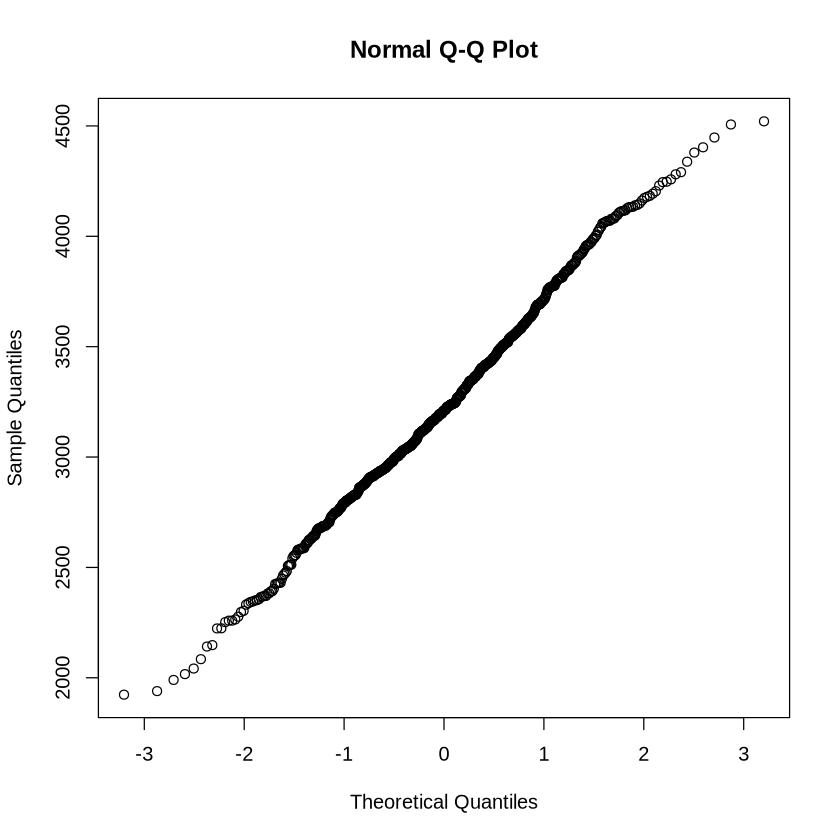

In [78]:
qqnorm(children_data[["Weight"]])

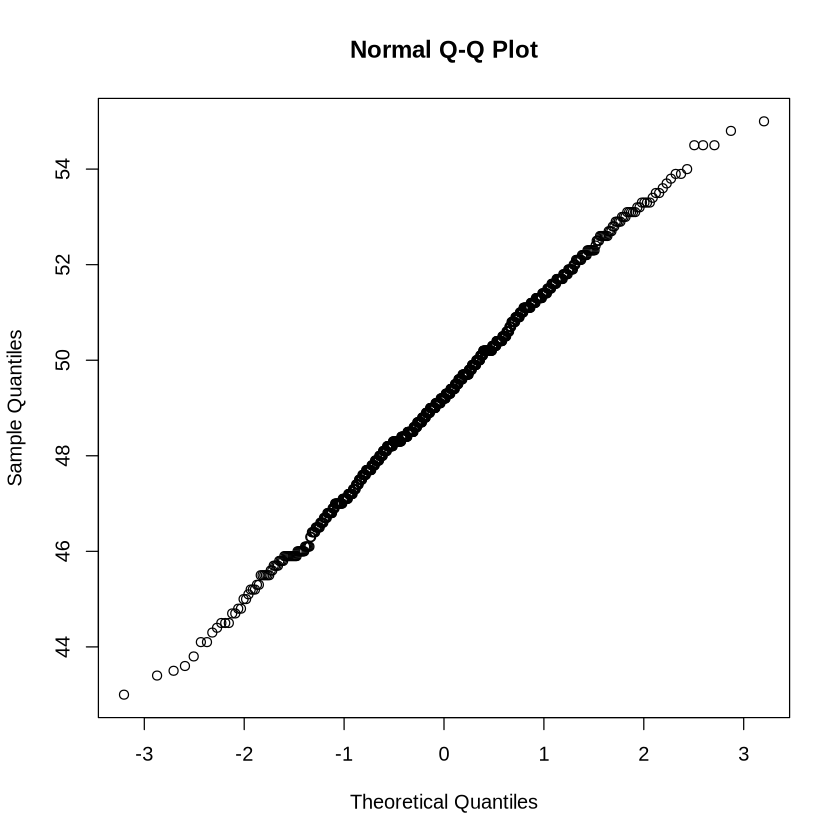

In [79]:
qqnorm(children_data[["Length"]])

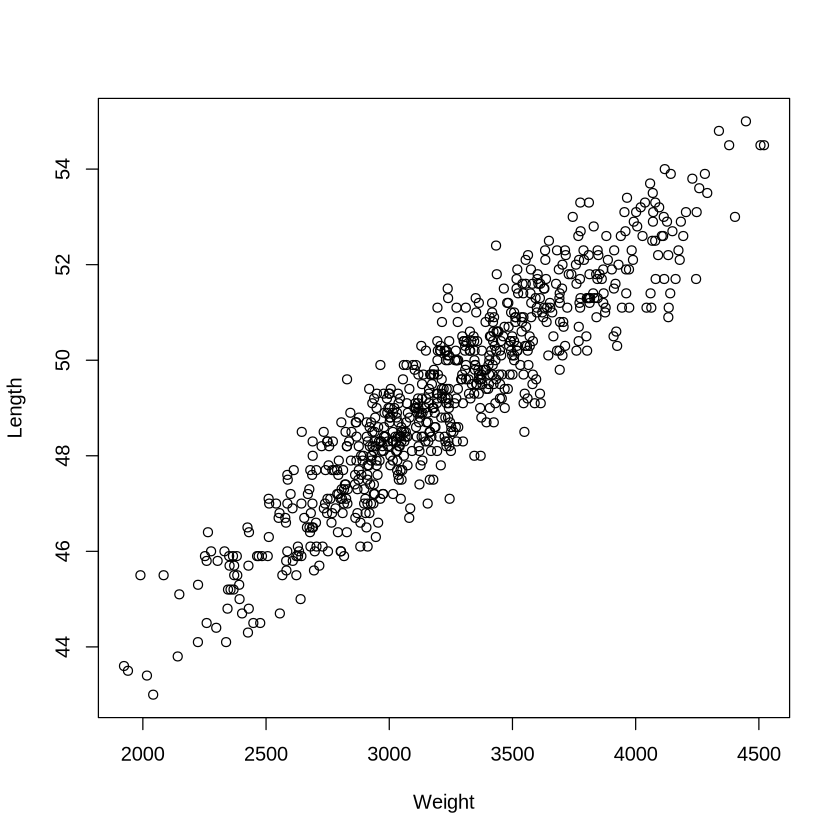

In [80]:
plot(children_data)

In [81]:
generate_ellipse_data <- function(covariance, means, level) {  
  # sigma: covariance matrix, mu: mean vector, level: probability 
  ellipse_data = ellipse(x = covariance, centre = means, level = level)
  ellipse_data = as.data.frame(ellipse_data)
  return(ellipse_data)
}

In [110]:
centralized_children_data <- sweep(children_data, MARGIN=2, means, FUN="-")

In [112]:
children_c2 <- rowSums((as.matrix(centralized_children_data) %*% solve(covariance)) * (centralized_children_data))

In [140]:
children_c2_in_outer_ellipse <- children_c2 <= qchisq(0.95, df=2)
children_c2_in_inner_ellipse <- children_c2 <= qchisq(0.75, df=2)
children_labels <- as.integer(children_c2_in_outer_ellipse & !children_c2_in_inner_ellipse) + 2 * as.integer(children_c2_in_inner_ellipse) +1
labels <- c("Score_0", "Score_1", "Score_2")
children_labels <- labels[children_labels]

In [141]:
table(children_labels)

children_labels
Score_0 Score_1 Score_2 
     38     157     541 

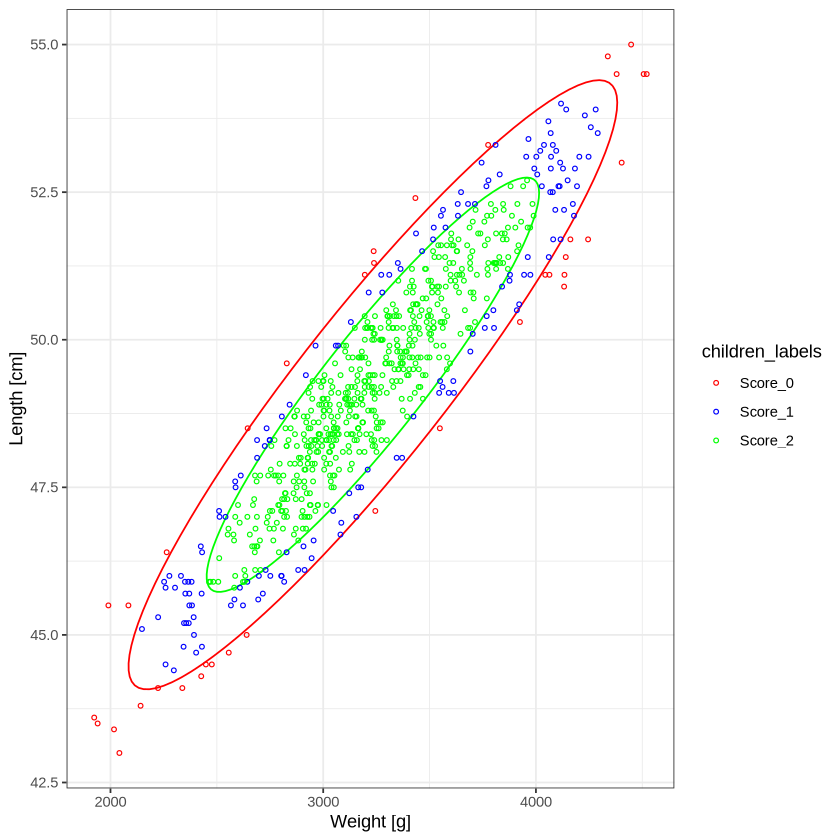

In [142]:
color_mapping <- c("Score_0" = "red", "Score_1" = "blue", "Score_2" = "green")
ggplot() +
geom_path(data = generate_ellipse_data(covariance, means, 0.95), aes(x = Weight, y = Length), color='red') +
geom_path(data = generate_ellipse_data(covariance, means, 0.75), aes(x = Weight, y = Length), color='green') +
geom_point(data = children_data, aes(x = Weight, y = Length, color=children_labels), size = 1, shape = 21) +
scale_color_manual(values = color_mapping) +
theme_bw() +
labs(x = "Weight [g]", y = "Length [cm]")

In [47]:
decomposition <- eigen(covariance)
decomposition

eigen() decomposition
$values
[1] 2.202805e+05 6.400477e-01

$vectors
             [,1]         [,2]
[1,] -0.999991367  0.004155185
[2,] -0.004155185 -0.999991367


In [48]:
decomposition$values[1] * decomposition$vectors[,1] %*% t(decomposition$vectors[,1]) 

220276.6577,915.298170
915.2982,3.803266


In [49]:
decomposition$values[2] * decomposition$vectors[,2] %*% t(decomposition$vectors[,2]) 

1.105078e-05,-0.002659494
-2.659494e-03,0.640036621


In [51]:
decomposition$values[1] * decomposition$vectors[,1] %*% t(decomposition$vectors[,1]) + decomposition$values[2] * decomposition$vectors[,2] %*% t(decomposition$vectors[,2]) - covariance

,Weight,Length
Weight,2.910383e-11,0
Length,0.000000e+00,0


In [157]:
children_data_ptransformed <- as.data.frame(as.matrix(children_data) %*% decomposition$vectors)
children_data_ptransformed

V1,V2
<dbl>,<dbl>
-3677.083,-36.32135
-2828.276,-36.44831
-3853.682,-35.78755
-3815.480,-35.44628
-3558.978,-35.51209
-2937.672,-35.19373
-2689.277,-37.12587
-3109.077,-36.08152
-3272.276,-35.60339


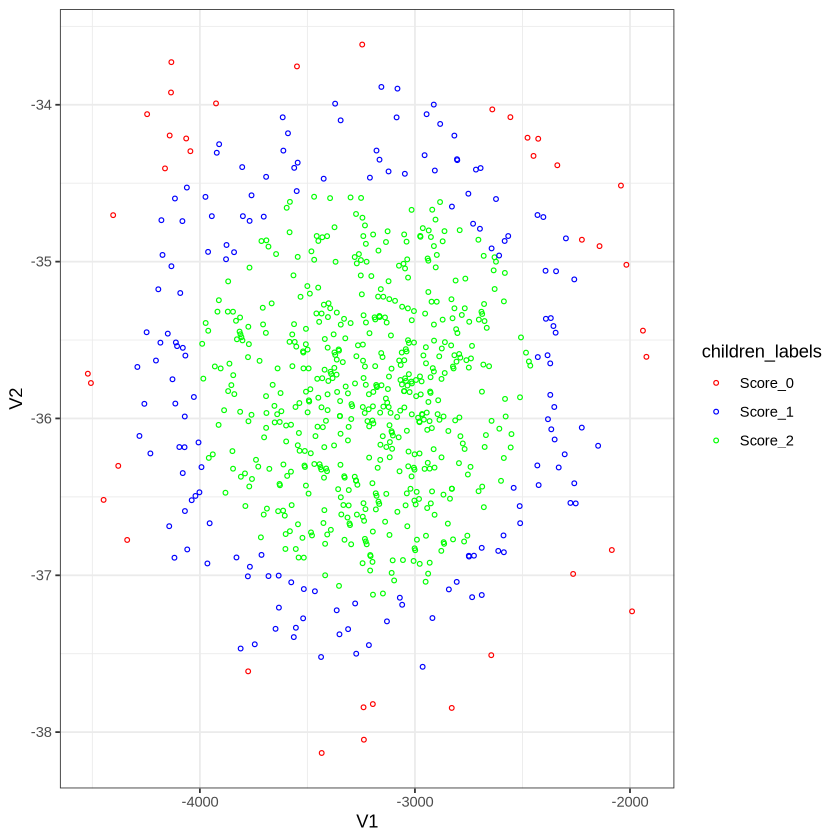

In [158]:
ggplot() +
geom_point(data = children_data_ptransformed, aes(x = V1, y = V2, color=children_labels), size = 1, shape = 21) +
scale_color_manual(values = color_mapping) +
theme_bw() 